In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,FunctionTransformer,StandardScaler,MinMaxScaler
import pickle

In [2]:
dataset = pd.read_csv(r"D:\old car price\csv\cars_delhi_eda.csv")

In [3]:
dataset.head(1)

,variant,transmission,km_driven,owner_type,fuel_type,registeration,price,year_launch,company_name,model_name
0,XM 1.2,Manual,95230,1st Owner,Petrol,UP-16,650000,2018,Tata,NEXON


In [4]:
dataset.shape

(899, 10)

In [5]:
dataset.drop(columns=['registeration'],inplace=True)

In [6]:
dataset.isnull().sum()

variant         0
transmission    0
km_driven       0
owner_type      0
fuel_type       0
price           0
year_launch     0
company_name    0
model_name      0
dtype: int64

# variant

In [7]:
le_variant = LabelEncoder()
le_variant.fit(dataset['variant'])

LabelEncoder()

In [8]:
dataset['variant'] = (le_variant.transform(dataset['variant']))

In [9]:
p1 = open("variant_en.txt","wb")
pickle.dump(le_variant,p1)
p1.close()

# transmission

In [10]:
dataset['transmission'].value_counts()

transmission
Manual       706
Automatic    193
Name: count, dtype: int64

In [11]:
ohe_transmission = OneHotEncoder()
ohe_transmission.fit(dataset[['transmission']])

OneHotEncoder()

In [12]:
new_transmission = pd.DataFrame(ohe_transmission.transform(dataset[['transmission']]).toarray(),columns=['Automatic',"Manual"])

In [13]:
dataset = pd.concat((dataset,new_transmission),axis=1)

In [14]:
dataset.drop(columns=['transmission'],inplace=True)

In [15]:
p2 = open("transmission_en.txt","wb")
pickle.dump(ohe_transmission,p2)
p2.close()

# owner_type

In [16]:
dataset['owner_type'].value_counts()

owner_type
1st Owner    762
2nd Owner    137
Name: count, dtype: int64

In [17]:
ohe_owner_type = OneHotEncoder()
ohe_owner_type.fit(dataset[['owner_type']])

OneHotEncoder()

In [18]:
ohe_owner_type.transform(dataset[['owner_type']]).toarray()

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [19]:
new_owner_type = pd.DataFrame(ohe_owner_type.transform(dataset[['owner_type']]).toarray(),columns=['1st Owner',"2nd Owner"])

In [20]:
dataset = pd.concat((dataset,new_owner_type),axis=1)

In [21]:
dataset.drop(columns=['owner_type'],inplace=True)

In [22]:
p3 = open("owner_type_en.txt","wb")
pickle.dump(ohe_owner_type,p3)
p3.close()

# fuel_type

In [23]:
dataset['fuel_type'].value_counts()

fuel_type
Petrol    670
Diesel    132
CNG        97
Name: count, dtype: int64

In [24]:
le_fuel_type = LabelEncoder()
le_fuel_type.fit(dataset['fuel_type'])
dataset['fuel_type'] = le_fuel_type.transform(dataset['fuel_type'])

In [25]:
p4 = open("le_fuel_type.txt","wb")
pickle.dump(le_fuel_type,p4)
p4.close()

# company_name

In [26]:
le_company_name = LabelEncoder()
le_company_name.fit(dataset['company_name'])
dataset['company_name'] = le_company_name.transform(dataset['company_name'])

In [27]:
p5 = open("le_company_name.txt","wb")
pickle.dump(le_company_name,p5)
p5.close()

# model_name

In [28]:
le_model_name = LabelEncoder()
le_model_name.fit(dataset['model_name'])
dataset['model_name'] = le_model_name.transform(dataset['model_name'])

In [29]:
p6 = open("le_model_name.txt","wb")
pickle.dump(le_model_name,p6)
p6.close()

# outlier

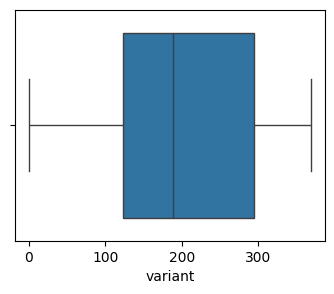

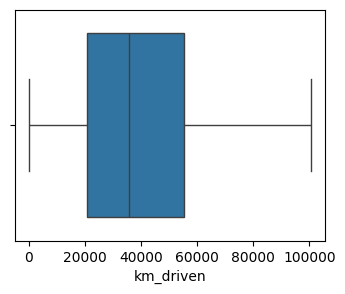

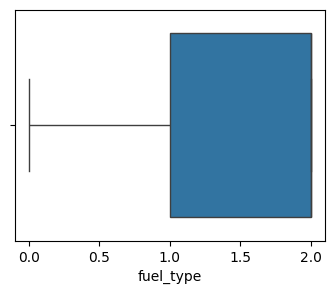

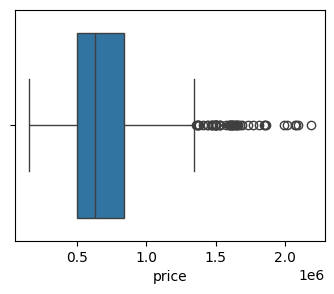

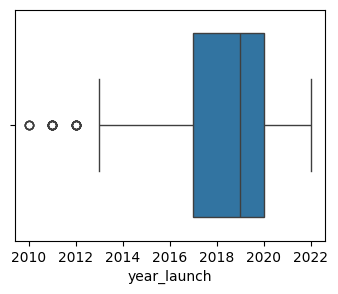

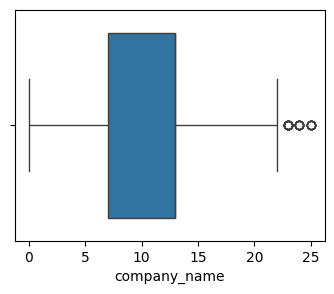

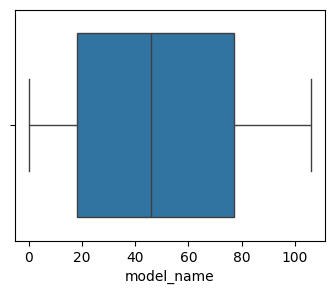

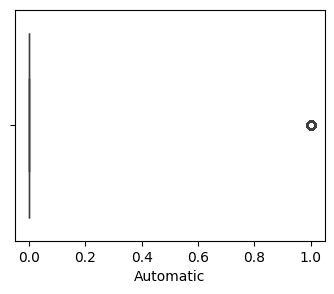

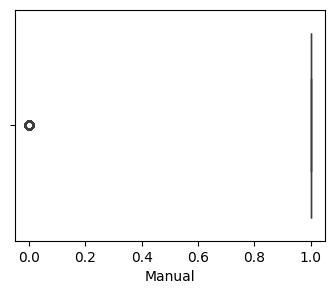

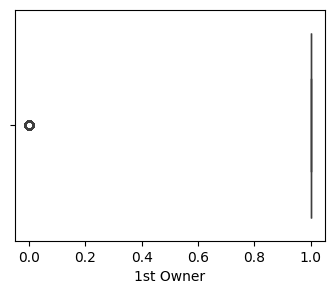

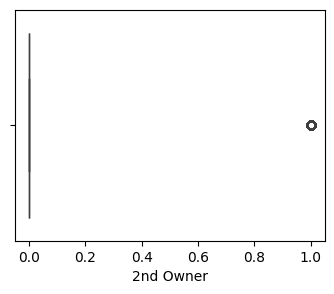

In [30]:
for i in dataset.columns :
    plt.figure(figsize=(4,3))
    sns.boxplot(x=i,data=dataset)
    plt.show()

# normal dist

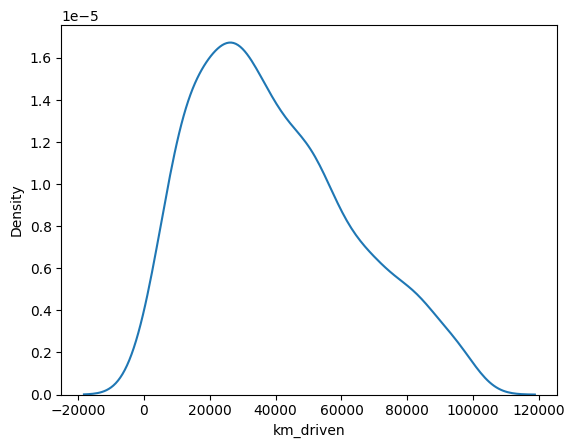

In [31]:
sns.kdeplot(x="km_driven",data=dataset)
plt.show()

# data split input and output

In [32]:
input_data = dataset.drop(columns=['price'])
output_data = dataset['price']

# scaling

In [33]:
ss = StandardScaler()
ss.fit(input_data)
input_data = pd.DataFrame(ss.transform(input_data),columns=input_data.columns)

In [34]:
p7 = open("ss.txt","wb")
pickle.dump(ss,p7)
p7.close()

# final data

In [35]:
final_data = pd.concat((input_data,output_data),axis=1)

In [36]:
final_data.to_csv("car_data_ml.csv",index=False)